In [1]:
import tensorflow as tf
import numpy as np

import pandas as pd


In [2]:
df=pd.read_csv("fer2013.csv",sep=",")
print(df)


       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
5            2  55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...     Training
6            4  20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...     Training
7            3  77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...     Training
8            3  85 84 90 121 101 102 133 153 153 169 177 189 1...     Training
9            2  255 254 255 254 254 179 122 107 95 124 149 150...     Training
10           0  30 24 21 23 25 25 49 67 84 103 120 125 130 139...     Training
11           6  39 75 78 58 58 45 49 48 103 156 81 4

In [3]:
y=df['emotion'].values
x=df['pixels'].values
print(type(x))

<class 'numpy.ndarray'>


In [4]:
l=[]
for i in range(len(x)):
     l.append(list(map(int,x[i].split())))




In [5]:
x=np.reshape(np.array(l),(35887,48,48,1))


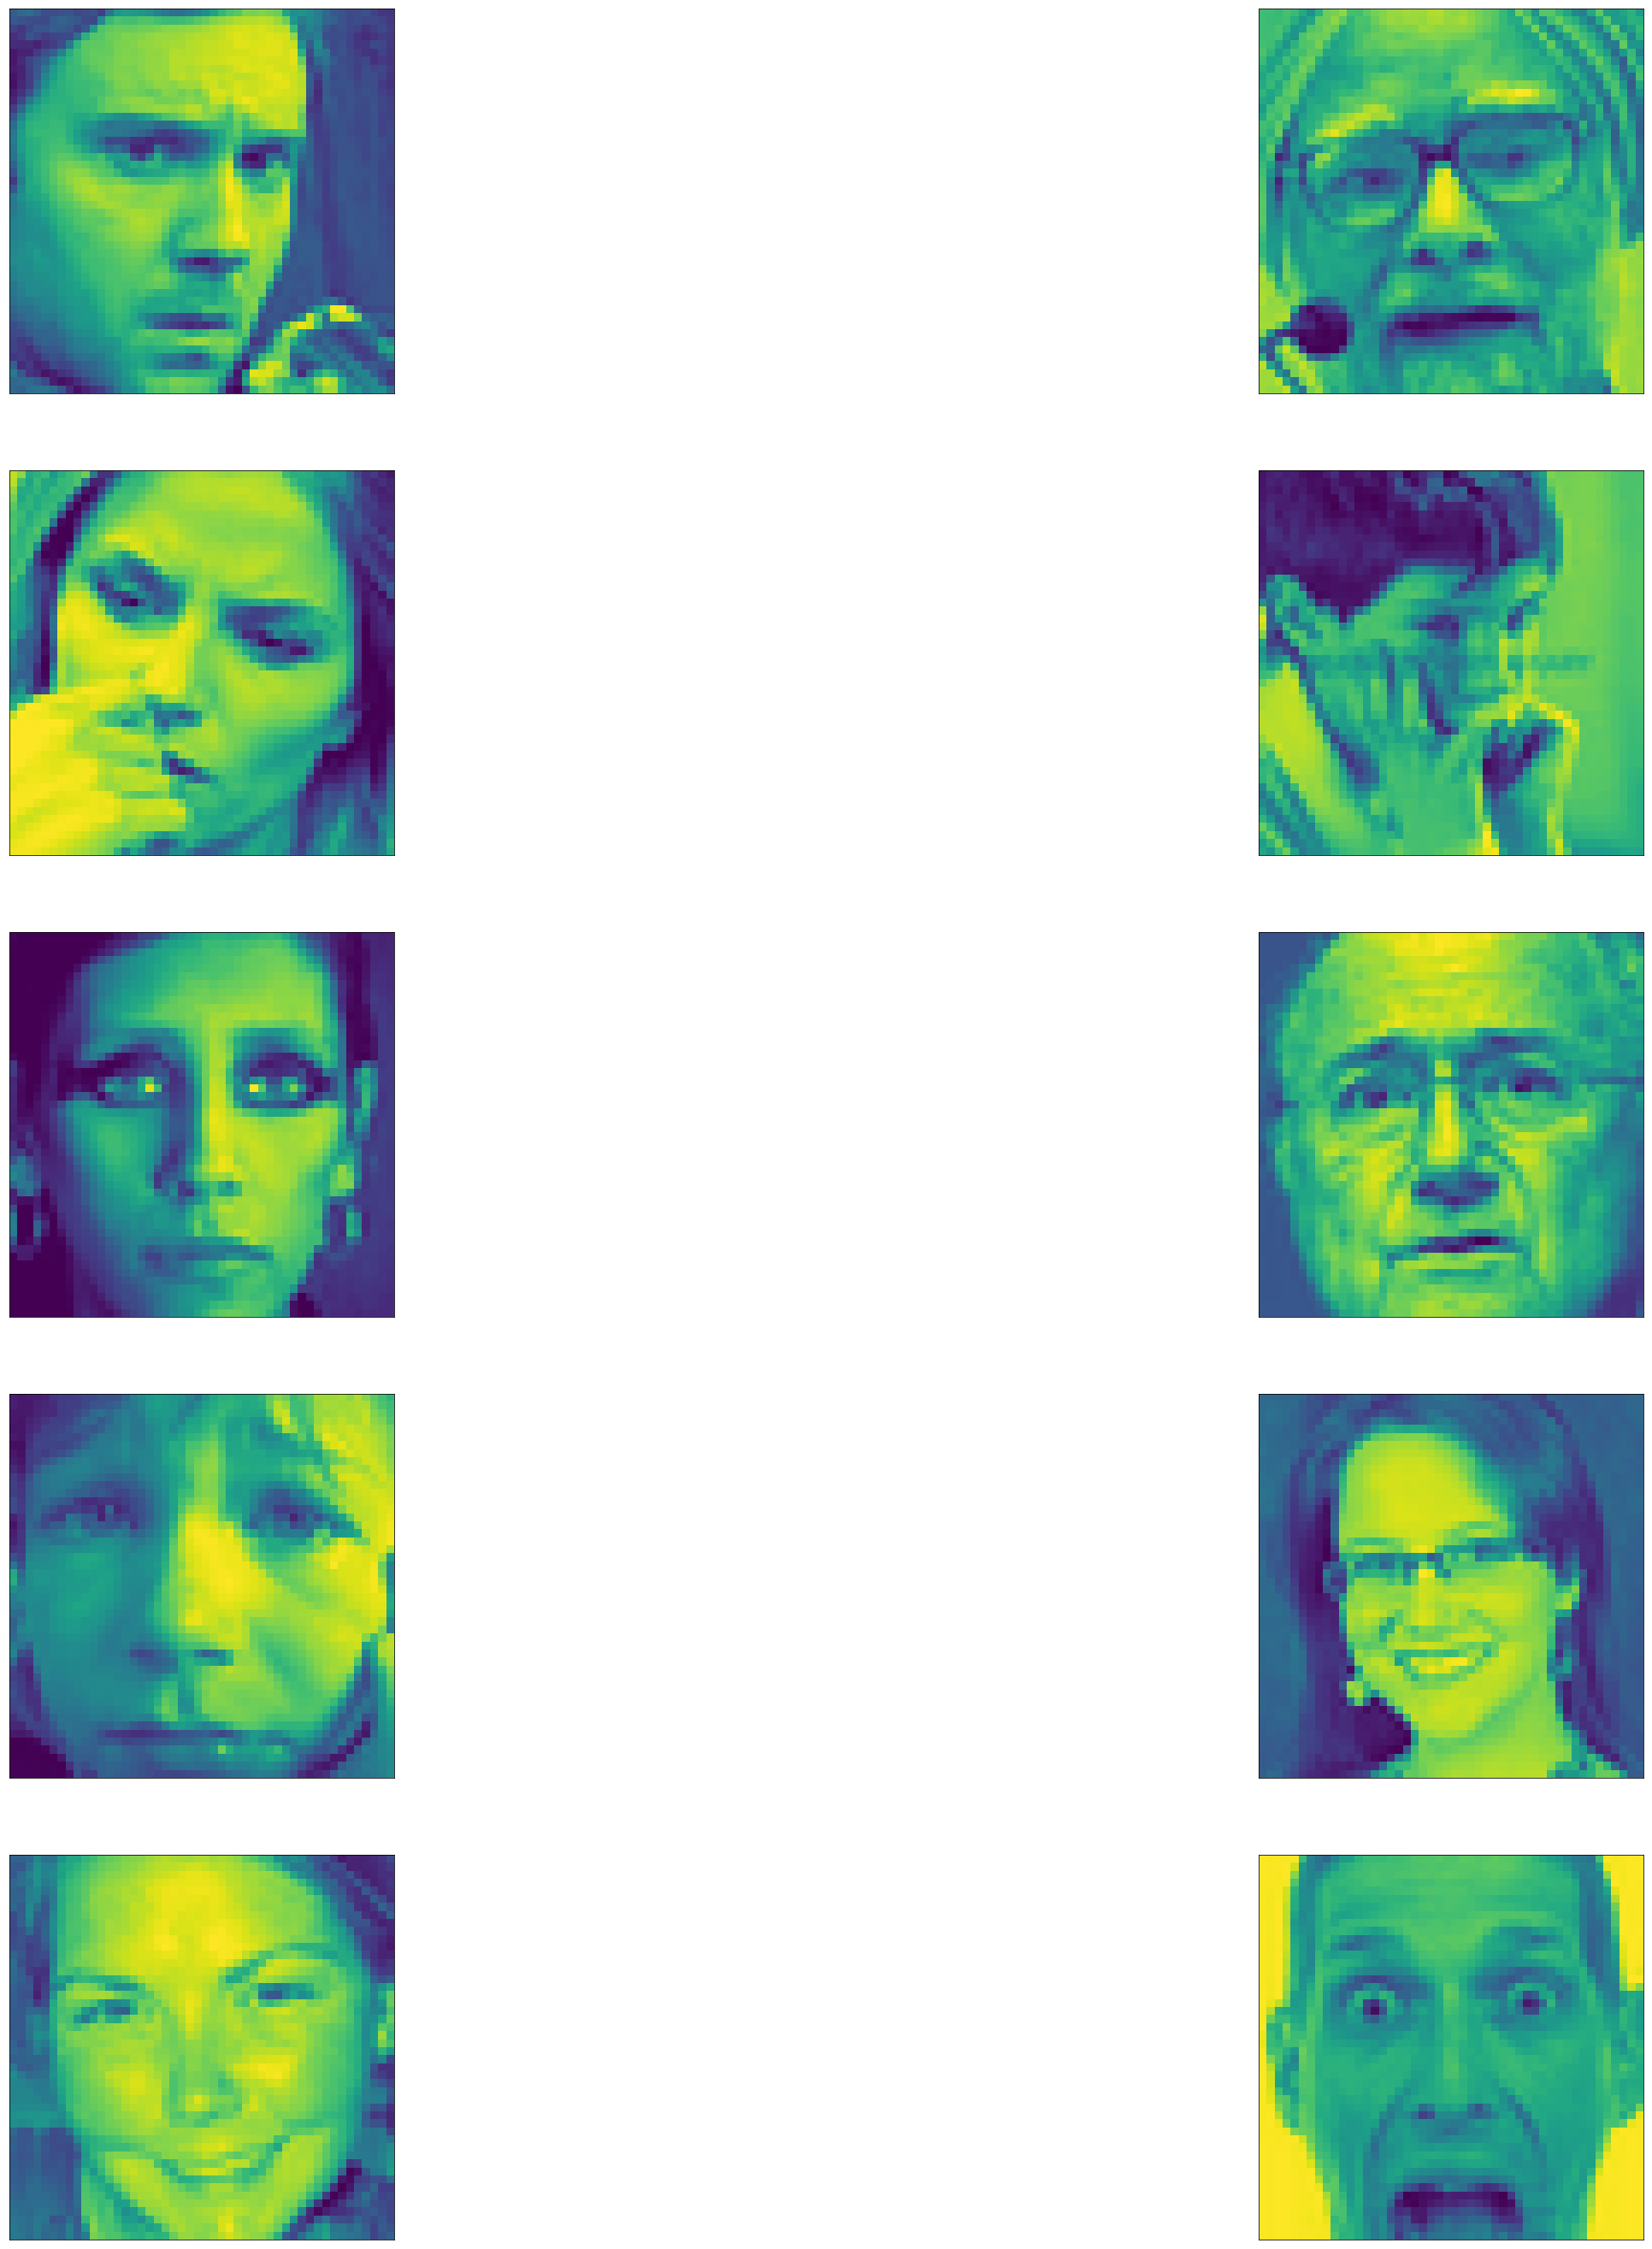

In [7]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(48,48))
for i in range(10):
    ax=fig.add_subplot(5,2,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x[i]))


In [8]:
x_train=x[0:28709]
y_train=y[0:28709]

x_test=x[28709:x.shape[0]]
y_test=y[28709:y.shape[0]]
#print(y_train)

num_classes=7
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape)


(28709, 48, 48, 1)


In [9]:
x_train=x_train/255.0
x_test=x_test/255.0

In [10]:
from tensorflow.keras.layers import Activation, Convolution2D, Dropout, Conv2D
from tensorflow.keras.layers import AveragePooling2D, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
def mini_XCEPTION(input_shape, num_classes, l2_regularization=0.01):
    regularization = l2(l2_regularization)

    # base
    img_input = Input(input_shape)
    x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization,
                                            use_bias=False)(img_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization,
                                            use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # module 1
    residual = Conv2D(16, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(16, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(16, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])

    # module 2
    residual = Conv2D(32, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(32, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(32, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])

    # module 3
    residual = Conv2D(64, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(64, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(64, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])

    # module 4
    residual = Conv2D(128, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(128, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(128, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])

    x = Conv2D(num_classes, (3, 3),
            #kernel_regularizer=regularization,
            padding='same')(x)
    x = GlobalAveragePooling2D()(x)
    output = Activation('softmax',name='predictions')(x)

    model = Model(img_input, output)
    return model

In [11]:
model = mini_XCEPTION((48,48,1), 7)
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 48, 1)    0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 46, 46, 8)    72          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1 (BatchNo (None, 46, 46, 8)    32          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 46, 46, 8)    0           batch_normalization_v1[0][0]     
_____________________________________

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer=ModelCheckpoint(filepath='_mini_XCEPTION.102-0.66.hdf5',verbose=1,save_best_only=True)
model.load_weights('_mini_XCEPTION.102-0.66.hdf5')
hist=model.fit(x_train,y_train,validation_split=0.2,epochs=1,batch_size=32,shuffle=True,verbose=1,callbacks=[checkpointer])

Train on 22967 samples, validate on 5742 samples
 4032/22967 [====>.........................] - ETA: 9:27 - loss: 1.0493 - acc: 0.6096

KeyboardInterrupt: 

In [14]:
model.load_weights('_mini_XCEPTION.102-0.66.hdf5')


In [15]:
score=model.evaluate(x_test,y_test,verbose=0)
print(score)

[1.3549319330647518, 0.5059905]


In [16]:
predicts=model.predict(x_test)
cifar10_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [17]:
predicts.shape

(7178, 7)

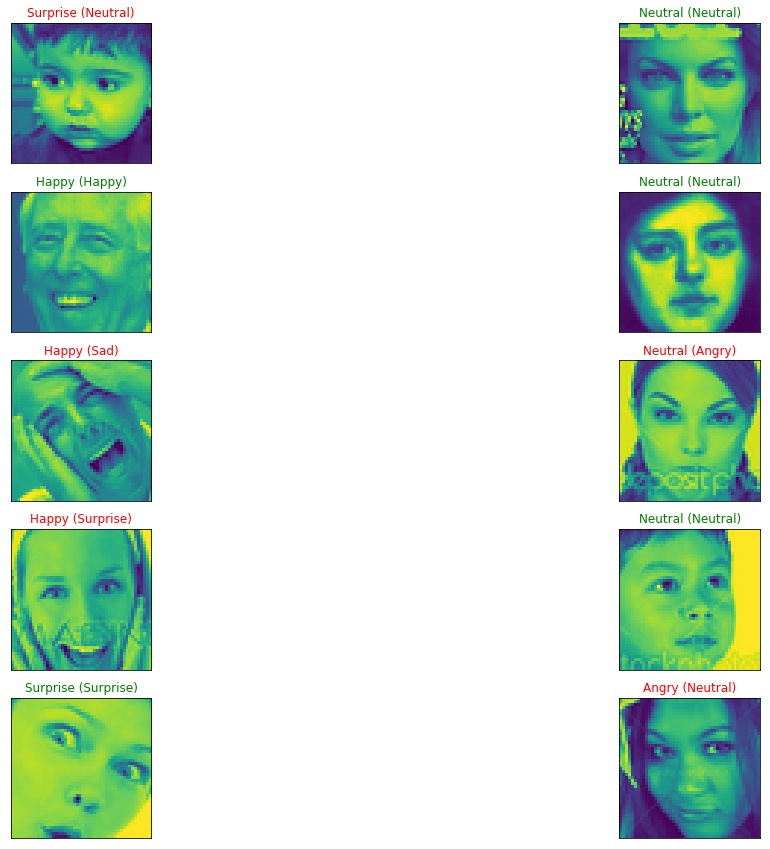

In [18]:
fig = plt.figure(figsize=(20, 15))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=10, replace=False)):
    ax = fig.add_subplot(5, 2, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(predicts[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))